# Worksheet Mini Bootcamp Mata Kuliah Basisdata

### Disclaimer!!!

Beberapa modul yang digunakan diantaranya adalah numpy dan pandas, dimana didalam kedua library tersebut juga terdapat fungsi-fungsi serupa dengan query SQL.

Contoh:
- untuk mengelompokkan data, pada pandas terdapat fungsi `groupby(<nama kolom>)`, juga pada SQL terdapat `GROUP BY <nama kolom>`
- untuk filtering data, pada numpy terpadapat fungsi `where(<kondisi>)`, juga pada SQL terdapat `WHERE <kondisi>` 
- dll

Pada kasus ini dan jika memungkinkan, disarankan untuk menggunakan query SQL. Selain untuk tujuan **proses pembelajaran**, pengolahan data menggunakan SQL **lebih cepat** dibandingkan hanya menggunakan python.

### Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mysql.connector as connector
from mysql.connector import Error

### Koneksi ke database `university`

In [3]:
try:
    conn = connector.connect(host = "localhost", user = "root", password = "maftuh2003", database = "university")

    if conn.is_connected():           # cek apakah sudah terkoneksi
        print("MySQL is connected")
        cursor = conn.cursor()        # membuat cursor untuk eksekusi query pada proses2 berikutnya

except Error as e:
    print("Error while connecting to MySQL", e)

MySQL is connected


***

### Melakukan "query" ke database
Terdapat beberapa cara:
1. menggunakan `cursor`
2. langsung menggunakan modul `pandas`

#### 1. Menggunakan cursor
<pre>
conn = connector.connect(...)
cursor = conn.cursor()
cursor.execute("SELECT * FROM ... ")
result = cursor.fetchall()
print(result)
</pre>

#### 2. Menggunakan pandas
<pre>
conn = connector.connect(...)
df = pd.read_sql("SELECT * FROM ... ", con = conn)
df.head()
</pre>

***

### Tables 

In [181]:
query = "SHOW TABLES"
pd.read_sql(query, con = conn)

,Tables_in_university
0,advisor
1,classroom
2,course
3,department
4,instructor
5,prereq
6,section
7,student
8,takes
9,teaches


### ERD
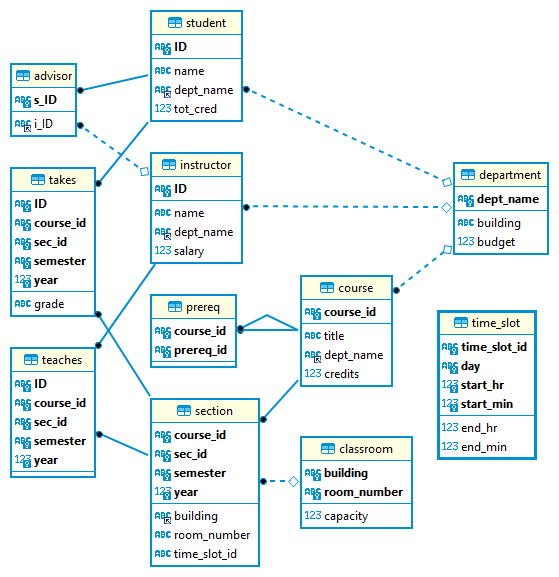

### Table Student

In [4]:
query = "SELECT * FROM student"
cursor.execute(query)
result = cursor.fetchall()
pd.DataFrame(result, columns=['ID', 'name', 'dept_name', 'total_cred']).head()

## Kekurangan menggunakan cursor adalah code terlalu panjang
## dan tipe data yang seharusnya numerik masih bertipe data string

,ID,name,dept_name,total_cred
0,1000,Manber,Civil Eng.,39
1,10033,Zelty,Mech. Eng.,60
2,10076,Duan,Civil Eng.,105
3,1018,Colin,Civil Eng.,81
4,10204,Mediratta,Geology,112


In [5]:
query = "SELECT * FROM student"
pd.read_sql(query, con = conn).head()

,ID,name,dept_name,tot_cred
0,1000,Manber,Civil Eng.,39.0
1,10033,Zelty,Mech. Eng.,60.0
2,10076,Duan,Civil Eng.,105.0
3,1018,Colin,Civil Eng.,81.0
4,10204,Mediratta,Geology,112.0


## 1. jumlah siswa di setiap jurusan 

In [28]:
query = """
    SELECT dept_name, COUNT(ID) as total
    FROM student
    GROUP BY dept_name
    ORDER BY total ASC
"""

df = pd.read_sql(query, con = conn)
df

,dept_name,total
0,Marketing,85
1,Statistics,85
2,Cybernetics,86
3,Math,91
4,Athletics,92
5,Geology,92
6,English,95
7,Physics,96
8,Finance,97
9,Elec. Eng.,98


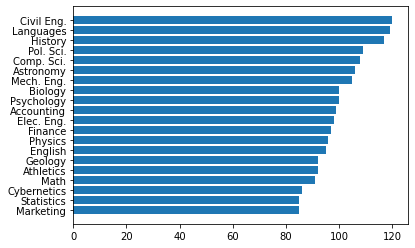

In [15]:
plt.barh(df['dept_name'], df['total'])
plt.show()

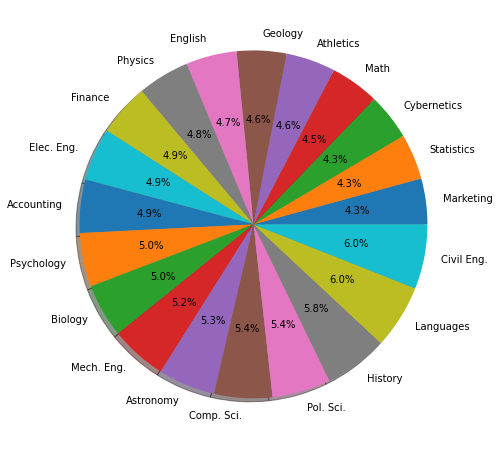

In [21]:
plt.figure(figsize = (8,8))
plt.pie(df['total'],
    labels=df['dept_name'], 
    autopct="%1.1f%%", 
    shadow=True)
plt.show()

## 2. siswa yang paling banyak mengambil sks/matakuliah

In [32]:
query = """
    SELECT name, tot_cred, dept_name FROM student
    ORDER BY tot_cred DESC
"""

df = pd.read_sql(query, con = conn)
df

,name,tot_cred,dept_name
0,Yoneda,129.0,Cybernetics
1,Vagn,129.0,Biology
2,Chien,129.0,Statistics
3,Mercurio,129.0,History
4,Ende,129.0,Finance
...,...,...,...
1995,Macias,0.0,Comp. Sci.
1996,Piou,0.0,Physics
1997,Cox,0.0,Civil Eng.
1998,So,0.0,Psychology


In [33]:
top_ten_student = df.iloc[:10]
top_ten_student

,name,tot_cred,dept_name
0,Yoneda,129.0,Cybernetics
1,Vagn,129.0,Biology
2,Chien,129.0,Statistics
3,Mercurio,129.0,History
4,Ende,129.0,Finance
5,Kawakami,129.0,Comp. Sci.
6,Rzecz,129.0,Pol. Sci.
7,Barranco,129.0,Mech. Eng.
8,Cadis,129.0,History
9,Tabor,129.0,History


## 3. siswa yang memiliki nilai terbesar/terkecil

In [43]:
query = """
    SELECT student.name, student.dept_name, 
    course.title AS course_name,
    takes.grade
    FROM student
    JOIN takes ON student.ID = takes.ID
    JOIN course ON takes.course_id = course.course_id
"""

df = pd.read_sql(query, con = conn)
print("Shape", df.shape)
df.head()

Shape (30000, 4)


,name,dept_name,course_name,grade
0,Manber,Civil Eng.,The Music of the Ramones,C
1,Manber,Civil Eng.,World History,B+
2,Manber,Civil Eng.,Embedded Systems,B+
3,Manber,Civil Eng.,Music of the 50s,A-
4,Manber,Civil Eng.,Plastics,C+


In [38]:
df.grade.unique()

array(['C ', 'B+', 'A-', 'C+', 'C-', 'B ', 'A ', 'B-', 'A+'], dtype=object)

In [46]:
grade = {
    'C-': 2,
    'C ': 2.25,
    'C+': 2.5,
    'B-': 2.75, 
    'B ': 3,
    'B+': 3.25,
    'A-': 3.5,
    'A ': 3.75,
    'A+': 4
}

df['score'] = df['grade'].map(lambda x: grade[x])
df.head()

,name,dept_name,course_name,grade,score
0,Manber,Civil Eng.,The Music of the Ramones,C,2.25
1,Manber,Civil Eng.,World History,B+,3.25
2,Manber,Civil Eng.,Embedded Systems,B+,3.25
3,Manber,Civil Eng.,Music of the 50s,A-,3.50
4,Manber,Civil Eng.,Plastics,C+,2.50


In [ ]:
# df.groupby([''])

In [ ]:
# def f(x):
#     return grade[X]

# f = lambda x: grade[x]

## 4. rata-rata nilai siswa di setiap matakuliah/jurusan

In [50]:
df_avg_score = df.groupby(['course_name'], as_index=False)['score'].mean()
df_avg_score = df_avg_score.sort_values(['score'], ascending=False, ignore_index = True)
df_avg_score.head()

,course_name,score
0,Geology,3.079787
1,Plastics,3.052586
2,Japanese,3.051980
3,Arabic,3.047692
4,International Trade,3.047398


In [52]:
df_avg_score_top_ten = df_avg_score.iloc[:10]
df_avg_score_top_ten

,course_name,score
0,Geology,3.079787
1,Plastics,3.052586
2,Japanese,3.051980
3,Arabic,3.047692
4,International Trade,3.047398
5,Tort Law,3.043778
6,Biostatistics,3.039683
7,How to Groom your Cat,3.037963
8,Drama,3.034763
9,World History,3.033961


In [53]:
df_avg_score_bottom_ten = df_avg_score.iloc[-10:]
df_avg_score_bottom_ten

,course_name,score
63,Visual BASIC,2.972541
64,Race Car Driving,2.970588
65,Greek Tragedy,2.965607
66,Systems Software,2.959545
67,Plasma Physics,2.956811
68,Heat Transfer,2.939421
69,Video Gaming,2.930301
70,Mobile Computing,2.926316
71,Bioinformatics,2.921405
72,Bacteriology,2.900165


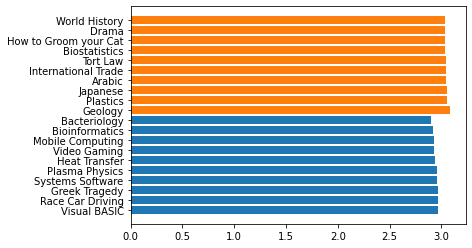

In [57]:
plt.barh(df_avg_score_bottom_ten.course_name, df_avg_score_bottom_ten.score)
plt.barh(df_avg_score_top_ten.course_name, df_avg_score_top_ten.score)
plt.show()

## 5. rata-rata gaji dosen dan mengajar di berapa matakuliah

## 6. matakuliah yg paling diminati di setiap jurusan

## 7. jumlah matakuliah di masing-masing jurusan


In [60]:
query = """
    SELECT dept_name, COUNT(title) as total FROM course
    GROUP BY dept_name
    ORDER BY total DESC
"""

df = pd.read_sql(query, con = conn)
df

,dept_name,total
0,Cybernetics,20
1,Finance,14
2,Psychology,13
3,Mech. Eng.,12
4,Accounting,12
5,Astronomy,10
6,Civil Eng.,10
7,Languages,10
8,Geology,10
9,Comp. Sci.,10


## 8. waktu (kosong/full) di masing-masing ruangan

## 9. Tren Tiap Tahun Matakuliah yang paling diminati

## 10. Gaji Dosen Tertinggi tahun 2019 departemen apa

In [80]:
query = """
    SELECT AVG(salary) AS rata2, year 
    FROM instructor
    JOIN teaches ON teaches.ID = instructor.ID
    GROUP BY year
    ORDER BY year ASC
"""

df = pd.read_sql(query, con = conn)
print("Shape", df.shape)
df.head(20)

Shape (10, 2)


,rata2,year
0,94497.736000,2001.0
1,77423.160000,2002.0
2,72437.980833,2003.0
3,76787.940000,2004.0
4,88382.661250,2005.0
5,92690.613077,2006.0
6,80378.741667,2007.0
7,88440.646000,2008.0
8,83279.705556,2009.0
9,81544.782727,2010.0


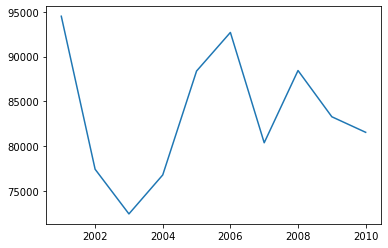

In [84]:
plt.plot(df.year, df.rata2)
plt.show()